In [85]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from dataset.generators import get_dataset_vgg, get_dataset_vgg_with_masks, get_dataset_mobilenet

# Dataset for VGG without masks

In [86]:
annot_path_val = '../datasets/coco_2017_dataset/annotations/person_keypoints_val2017.json'
img_dir_val = '../datasets/coco_2017_dataset/val2017/'

ds, ds_size = get_dataset_vgg(annot_path_val, img_dir_val, batch_size=10)
#ds, ds_size = get_dataset_mobilenet(annot_path_val, img_dir_val, batch_size=10)


loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000


## Get batch

In [87]:
x,y = next(ds.__iter__())

print ("Inputs:")
print (x.shape)

print ("Outputs:")
for output in y:
    print (output.shape)
    

Inputs:
(10, 368, 368, 3)
Outputs:
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)


## Input images

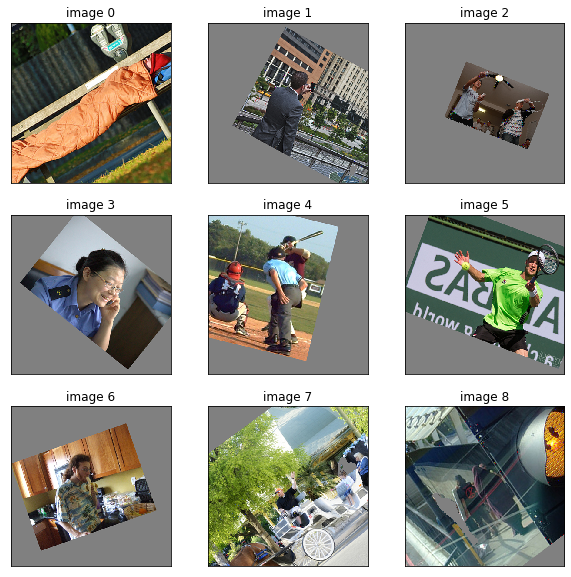

In [88]:
x_batch = x.numpy().astype(np.uint8)

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='image {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    plt.imshow(img[:,:,[2,1,0]])    

## Heatmaps

float32
1.0
0.0


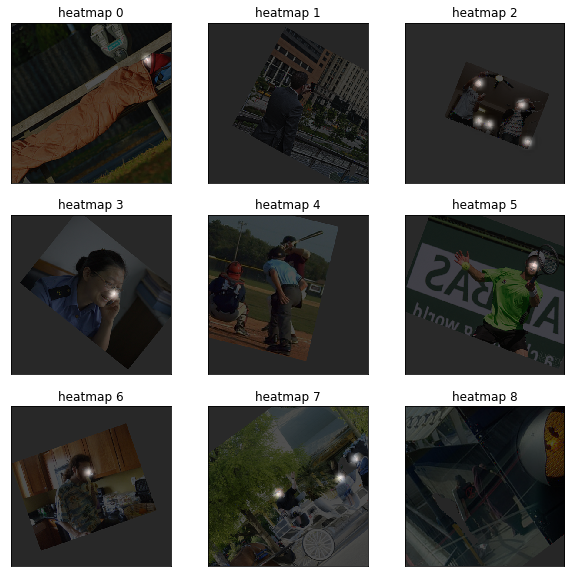

In [89]:
body_part = 0
output_idx = 11

x_batch = x.numpy().astype(np.uint8)
y_batch = y[output_idx].numpy()


print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    heatmap = y_batch[i,...]
    
    heatmap1 = cv2.resize(heatmap[:, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(heatmap1[:,:], alpha=.7, cmap='gray')

## PAF dx

float32
0.9999805
-0.99999166


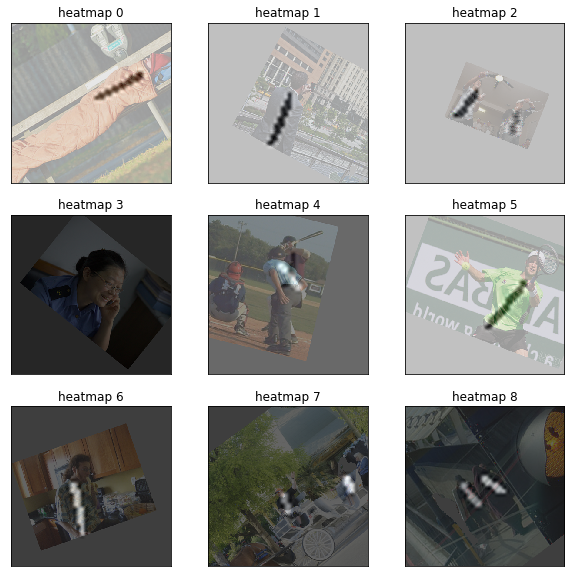

In [90]:
paf_idx = 0
output_idx = 10

x_batch = x.numpy().astype(np.uint8)
y_batch = y[output_idx].numpy()

print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    paf = y_batch[i,...]
    
    paf1 = cv2.resize(paf[:, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(paf1[:,:], alpha=.7, cmap='gray')

## PAF dy

float32
0.9999805
-0.99999166


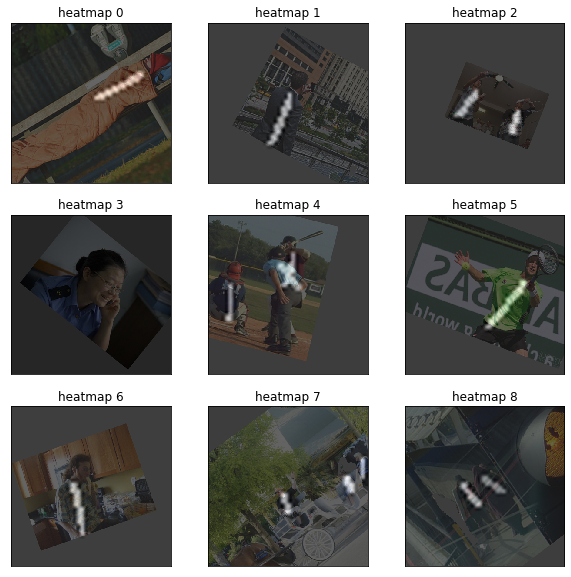

In [91]:
paf_idx = 1
output_idx = 10

x_batch = x.numpy().astype(np.uint8)
y_batch = y[output_idx].numpy()

print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='heatmap {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    paf = y_batch[i,...]
    
    paf1 = cv2.resize(paf[:, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(paf1[:,:], alpha=.7, cmap='gray')

# Dataset for VGG with masks

In [92]:
annot_path_val = '../datasets/coco_2017_dataset/annotations/person_keypoints_val2017.json'
img_dir_val = '../datasets/coco_2017_dataset/val2017/'

ds, ds_size = get_dataset_vgg_with_masks(annot_path_val, img_dir_val, batch_size=10)

loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000


## Get batch

In [93]:
x,y = next(ds.__iter__())

print ("Inputs:")
for inp in x:
    print (inp.shape)

print ("Outputs:")
for output in y:
    print (output.shape)

Inputs:
(10, 368, 368, 3)
(10, 46, 46, 38)
(10, 46, 46, 19)
Outputs:
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)
(10, 46, 46, 38)
(10, 46, 46, 19)


## Input images

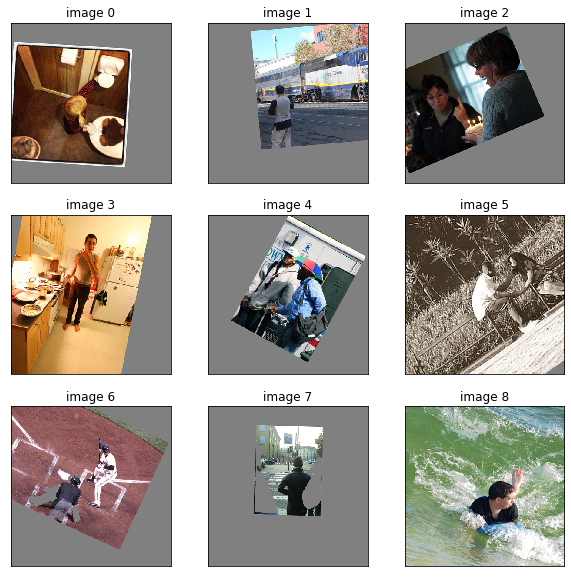

In [94]:
x_batch = x[0].numpy().astype(np.uint8)

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='image {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    plt.imshow(img[:,:,[2,1,0]])    

## Input masks

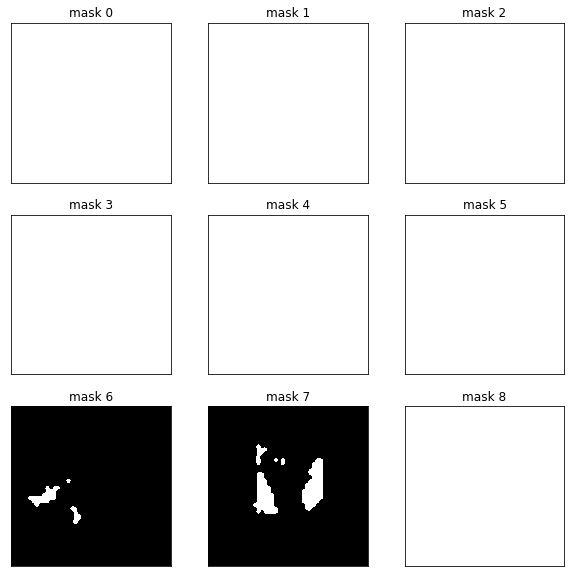

In [95]:
x_batch = x[1].numpy().astype(np.uint8)

figure = plt.figure(figsize=(10, 10))
for i in range(9):

    plt.subplot(3, 3, i + 1, title='mask {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,:,:,0]
    img = cv2.resize(img, (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img, cmap='binary')    
    